<a href="https://colab.research.google.com/github/RomanGustavo/Mestrado---ML/blob/main/codigo_aula10_fronteira_de_decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fronteira de Decisão


## Objetivos

Com este código, você irá:
- Plotar a Fronteira de Decisão para um modelo de Regressão Logística. Isso lhe dará uma maior noção sobre o que o modelo está prevendo.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Conjunto de dados

Vamos supor que você possui o seguinte conjunto de dados
- A variável de entrada `X` é uma numpy array com 6 exemplos de treinamento, cada um com duas características
- A variável de saída `y` é também uma numpy array com 6 exemplos, sendo que `y` é sempre `0` ou `1`

In [2]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

# >>> ADIÇÃO: parâmetros e função sigmoide
w = np.array([1.0, 1.0])
b = -3.0
def sigmoid(z):
    return 1/(1+np.exp(-z))

### Plotando os dados

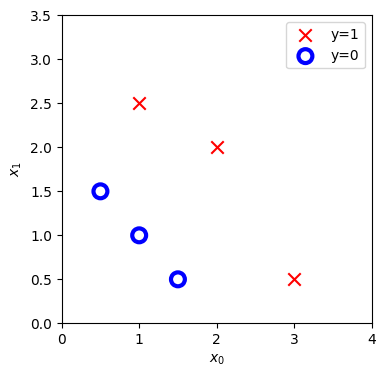

In [3]:
pos = y == 1 # identifica os elementos em y que são iguais a 1
neg = y == 0 # identifica os elementos em y que são iguais a 0

fig,ax = plt.subplots(1,1,figsize=(4,4))
ax.scatter(X[pos,0], X[pos,1], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X[neg,0], X[neg,1], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
ax.legend()
plt.show()


  
## Plotando a Fronteira de Decisão para o modelo com $w_0=1$, $w_1=1$ e $b=-3$


Já vimos que o modelo de Regressão Logística aplica a função sigmoide para o modelo de regressão linear, conforme mostrado abaixo:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$

  onde

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$

Ou seja, se considerarmos $w_1=1$, $w_2=1$ e $b=-3$, significa que nosso modelo é

$$ f(\mathbf{x}) = g(-3 + x_0+x_1) $$


* A partir daquilo que aprendemos, sabemos que o modelo irá prever $y=1$ quando $-3 + x_0+x_1 >= 0$

Vamos verificar o que significa isso graficamente. Faremos isso plotando a Fronteira de Decisão $-3 + x_0+x_1 = 0$, que equivale a $x_1 = 3 - x_0$.


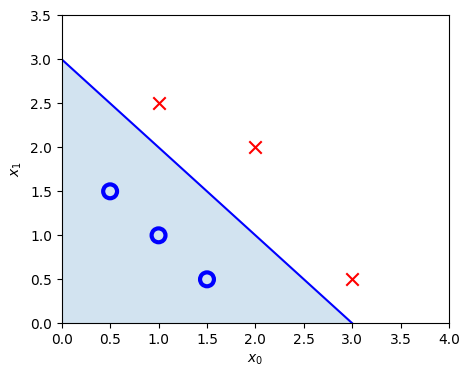

i  x0   x1    y   z       f_wb(x)   loss
1  0.5  1.5  0  -1.000    0.2689   0.313262
2  1.0  1.0  0  -1.000    0.2689   0.313262
3  1.5  0.5  0  -1.000    0.2689   0.313262
4  3.0  0.5  1   0.500    0.6225   0.474077
5  2.0  2.0  1   1.000    0.7311   0.313262
6  1.0  2.5  1   0.500    0.6225   0.474077

J(w,b) = 0.366867

Interpretação: f_wb(x) é a probabilidade prevista de classe 1. Coerente com o gráfico: se x0+x1 < 3 -> p<0.5 (classe 0); se x0+x1 > 3 -> p>0.5 (classe 1).


In [4]:
# Escolhendo valores entre 0 e 6
x0 = np.arange(0,6)

x1 = 3 - x0
fig,ax = plt.subplots(1,1,figsize=(5,4))

# Plotando a Fronteira de Decisão
ax.plot(x0,x1, c="b")
ax.axis([0, 4, 0, 3.5]) # limitando o display do gráfico

# Preenche a região abaixo da linha
ax.fill_between(x0,x1, alpha=0.2)

# Plotando os dados também:
ax.scatter(X[pos,0], X[pos,1], marker='x', s=80, c = 'red', label="y=1")
ax.scatter(X[neg,0], X[neg,1], marker='o', s=100, label="y=0", facecolors='none',
              edgecolors='b',lw=3)

ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$')
plt.show()

# ====== ADIÇÕES: Itens 2, 3 e 4 ======

# Parâmetros do modelo
w = np.array([1.0, 1.0])
b = -3.0

# Sigmoide
def sigmoid(z):
    return 1/(1+np.exp(-z))

# (2) f_{w,b}(x) para cada amostra
z = X @ w + b                  # z = x0 + x1 - 3
p = sigmoid(z)                 # prob. prevista classe 1

# (3) perda por amostra (log loss) com proteção numérica
eps = 1e-15
p_clip = np.clip(p, eps, 1-eps)
loss_i = - y*np.log(p_clip) - (1-y)*np.log(1-p_clip)

# (4) custo médio J(w,b)
J = loss_i.mean()

# Impressão organizada
print("i  x0   x1    y   z       f_wb(x)   loss")
for i,(xi,yi,zi,pi,li) in enumerate(zip(X,y,z,p,loss_i), start=1):
    print(f"{i}  {xi[0]:.1f}  {xi[1]:.1f}  {yi}  {zi: .3f}   {pi: .4f}   {li:.6f}")
print(f"\nJ(w,b) = {J:.6f}")

# Observação breve
print("\nInterpretação: f_wb(x) é a probabilidade prevista de classe 1. "
      "Coerente com o gráfico: se x0+x1 < 3 -> p<0.5 (classe 0); se x0+x1 > 3 -> p>0.5 (classe 1).")

* No gráfico acima, a linha azul representa a linha $x_0 + x_1 - 3 = 0$ e ela intercepta o eixo x0 em 3 (para $x_1=0$, tem-se $x_0=3$)


* A região com cor azul representa $-3 + x_0+x_1 < 0$. A região acima da linha representa $-3 + x_0+x_1 > 0$.


* Qualquer ponto na região com cor azul (abaixo da linha) é classificado como $y=0$. Qualquer ponto acima da curva é classificado como $y=1$. Essa linha é chamada de "Fronteira de Decisão".

Também vimos que, usando termos polinomiais de maior ordem (por exemplo, $f(x) = g( x_0^2 + x_1 -1)$ ), Fronteiras de Decisão mais complexas podem ser obtidas!

Respostas:
1) A fronteira de decisão na Regressão Logística é a linha que separa as classes. Ela corresponde aos pontos onde a probabilidade prevista pelo modelo é 0,5, ou seja, quando w*x+b=0. Em 2D, isso forma uma reta: de um lado os pontos são classificados como 0 e do outro como 1.

## Parabéns!

Você explorou a conceito de Fronteira de Decisão no contexto de Regressão Logística.